In [2]:
import matplotlib.pyplot as plt
from matplotlib import rc
from plotutils import *
rc('text', usetex=True)

# parameter tuning

In [3]:
# date = '09_19_2021'
# tol = 1e-6
date = '09_27_2021'
tol = 1e-5

In [4]:
schimdt = get_all(logdir='../IPG/test/log', date=[date], inexact_type='schimdt', loss='logit', use_ckpt=True, tol = tol, 
        lam_shrink=[0.1, 0.01], group_size=[10, 100], overlap_ratio=[0.1, 0.2, 0.3], excludes=['madelon'], param_lst=[1e0, 1e1, 1e2, 1e3, 1e4])
schimdt_time = collect_time(schimdt)

schimdt-1.0
 71/72 instances terminate with status:  0
  1/72 instances terminate with status:  4
schimdt-10.0
 71/72 instances terminate with status:  0
  1/72 instances terminate with status:  4
schimdt-100.0
 71/72 instances terminate with status:  0
  1/72 instances terminate with status:  4
schimdt-1000.0
 71/72 instances terminate with status:  0
  1/72 instances terminate with status:  1
schimdt-10000.0
 70/72 instances terminate with status:  0
  2/72 instances terminate with status:  1


In [5]:
lee = get_all(logdir='../IPG/test/log', date=[date], inexact_type='lee', loss='logit', use_ckpt=True, tol = tol, 
        lam_shrink=[0.1, 0.01], group_size=[10, 100], overlap_ratio=[0.1, 0.2, 0.3], excludes=['madelon'], param_lst=[0.1, 0.2, 0.3, 0.4, 0.5])
lee_time = collect_time(lee)

lee-0.1
 70/72 instances terminate with status:  0
  2/72 instances terminate with status:  4
lee-0.2
 70/72 instances terminate with status:  0
  2/72 instances terminate with status:  4
lee-0.3
 70/72 instances terminate with status:  0
  2/72 instances terminate with status:  4
lee-0.4
 71/72 instances terminate with status:  0
  1/72 instances terminate with status:  4
lee-0.5
 70/72 instances terminate with status:  0
  2/72 instances terminate with status:  4


In [6]:
# there is bug in yd impl so I rerun this set
yd = get_all(logdir='../IPG/test/log', date=['09_30_2021'], inexact_type='yd', loss='logit', use_ckpt=True, tol = tol, 
        lam_shrink=[0.1, 0.01], group_size=[10, 100], overlap_ratio=[0.1, 0.2, 0.3], excludes=['madelon'], param_lst=[0.1, 0.2, 0.3, 0.4, 0.5])
yd_time = collect_time(yd)

yd-0.1
 70/72 instances terminate with status:  0
  2/72 instances terminate with status:  4
yd-0.2
 71/72 instances terminate with status:  0
  1/72 instances terminate with status:  4
yd-0.3
 71/72 instances terminate with status:  0
  1/72 instances terminate with status:  4
yd-0.4
 70/72 instances terminate with status:  0
  2/72 instances terminate with status:  4
yd-0.5
 70/72 instances terminate with status:  0
  2/72 instances terminate with status:  4


In [7]:
# fig, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize=(16,4))
# fig.suptitle('Total time spent on test instances with varing parameters')
# ax1.plot([0.1, 0.2, 0.3, 0.4, 0.5], yd_time, 'r-*')
# ax1.set_xlabel(r'$\gamma_1$')
# ax1.set_ylabel('time (in seconds)')
# ax1.set_title(r'\texttt{option} I')
# ax2.plot([0.1, 0.2, 0.3, 0.4, 0.5], lee_time, 'b-^')
# ax2.set_xlabel(r'$\gamma_2$')
# ax2.set_title(r'\texttt{option} II')
# ax3.plot([1e0, 1e1, 1e2, 1e3, 1e4], schimdt_time, 'k-o')
# ax3.set_xlabel(r'\texttt{const}')
# ax3.set_xscale('log')
# ax3.set_title(r'\texttt{option} III')
# fig.savefig("./natOG/paramter_sensitivity.pdf", dpi=300)

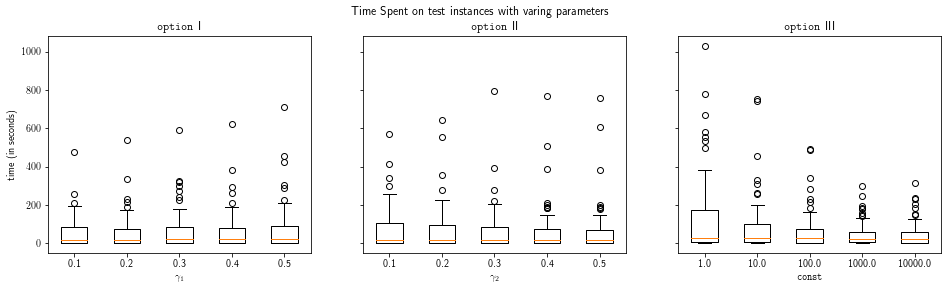

In [8]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize=(16,4))
fig.suptitle('Time Spent on test instances with varing parameters')
ax1.boxplot(prepare_box(yd))
ax1.set_xlabel(r'$\gamma_1$')
ax1.set_xticklabels([0.1, 0.2, 0.3, 0.4, 0.5])
ax1.set_ylabel('time (in seconds)')
ax1.set_title(r'\texttt{option} I')
ax2.boxplot(prepare_box(lee))
ax2.set_xlabel(r'$\gamma_2$')
ax2.set_xticklabels([0.1, 0.2, 0.3, 0.4, 0.5])
ax2.set_title(r'\texttt{option} II')
ax3.boxplot(prepare_box(schimdt))
ax3.set_xlabel(r'\texttt{const}')
ax3.set_xticklabels([1e0, 1e1, 1e2, 1e3, 1e4])
ax3.set_title(r'\texttt{option} III')
fig.savefig("./natOG/paramter_hist.pdf", dpi=300)

In [9]:
# schimdt = get_all(logdir='../IPG/test/log', date=date, inexact_type='schimdt', loss='logit', use_ckpt=True, tol = tol, 
#         lam_shrink=[0.1, 0.01], group_size=[10, 100], overlap_ratio=[0.1, 0.2, 0.3], excludes=['madelon'], param_lst=[1e0, 1e1, 1e2, 1e3, 1e4])
ppf = PerformanceProfile(schimdt)
ppf.get_subset_by_time(threshold=1, remove_failed=True)
pools = ppf.plot(column='time', show_num=True, options={'ratio_max':4}, plot=False)
print("=================")
schimdt_best = get_best(pools)
print('Best params:', schimdt_best)

All algorithms failed in 0 instances (failure code -2)
Metrics for failed instances are overwritten with np.inf
After subsetting, 72 instances are kept.
Best params: schimdt-1000.0


In [10]:
# lee = get_all(logdir='../IPG/test/log', date=date, inexact_type='lee', loss='logit', use_ckpt=True, tol = tol, 
#         lam_shrink=[0.1, 0.01], group_size=[10, 100], overlap_ratio=[0.1, 0.2, 0.3], excludes=['madelon'], param_lst=[0.1, 0.2, 0.3, 0.4, 0.5])
ppf = PerformanceProfile(lee)
ppf.get_subset_by_time(threshold=1, remove_failed=True)
pools = ppf.plot(column='time', show_num=True, options={'ratio_max':4}, plot=False)
print("=================")
lee_best = get_best(pools)
print('Best params:', lee_best)

All algorithms failed in 0 instances (failure code -2)
Metrics for failed instances are overwritten with np.inf
After subsetting, 72 instances are kept.
Best params: lee-0.5


In [11]:
# yd = get_all(logdir='../IPG/test/log', date=date, inexact_type='yd', loss='logit', use_ckpt=True, tol = tol, 
#         lam_shrink=[0.1, 0.01], group_size=[10, 100], overlap_ratio=[0.1, 0.2, 0.3], excludes=['madelon'], param_lst=[0.1, 0.2, 0.3, 0.4, 0.5])
ppf = PerformanceProfile(yd)
ppf.get_subset_by_time(threshold=1, remove_failed=True)
pools = ppf.plot(column='time', show_num=True, options={'ratio_max':4}, plot=False)
print("=================")
yd_best = get_best(pools)
print('Best params:', yd_best)

All algorithms failed in 0 instances (failure code -2)
Metrics for failed instances are overwritten with np.inf
After subsetting, 72 instances are kept.
Best params: yd-0.2


In [16]:
# cols = ['datasetid', 'F', 'time', 'nz']
# schimdt_df = schimdt[schimdt_best][cols].copy()
# lee_df = lee[lee_best][cols].copy()
# yd_df = yd[yd_best][cols].copy()



In [17]:
# pair_wise_comparison(yd_df, lee_df, suffixes_lst=['yd', 'lee'])

In [18]:
# pair_wise_comparison(yd_df, schimdt_df, suffixes_lst=['yd', 'schimdt'])

In [19]:
# pair_wise_comparison(lee_df, schimdt_df, suffixes_lst=['lee', 'schimdt'])

In [20]:
# final = {}
# final[yd_best] = yd[yd_best]
# final[lee_best] = lee[lee_best]
# final[schimdt_best] = schimdt[schimdt_best]
# ppf = PerformanceProfile(final)
# ppf.get_subset_by_time(threshold=1, remove_failed=True)
# _ = ppf.plot(column='time',show_num=False, options={'ratio_max':6}, save=True, saveDir='./natOG/', labels=['option I\ \ \ ', 'option II\ \ ', 'option III'])

# Plots

In [12]:
tol = 1e-5

In [13]:
schimdt = get_all(logdir='../IPG/test/log', date=['09_27_2021','09_28_2021', '09_29_2021'], inexact_type='schimdt', loss='logit', use_ckpt=True, tol = tol, 
        lam_shrink=[0.1, 0.01], group_size=[10, 100], overlap_ratio=[0.1, 0.2, 0.3], param_lst=[1e3])

schimdt-1000.0
 107/132 instances terminate with status:  0
  16/132 instances terminate with status:  1
   9/132 instances terminate with status:  2


In [14]:
lee = get_all(logdir='../IPG/test/log', date=['09_27_2021','09_28_2021', '09_29_2021'], inexact_type='lee', loss='logit', use_ckpt=True, tol = tol, 
        lam_shrink=[0.1, 0.01], group_size=[10, 100], overlap_ratio=[0.1, 0.2, 0.3], param_lst=[0.5])

lee-0.5
 107/132 instances terminate with status:  0
   2/132 instances terminate with status:  4
  15/132 instances terminate with status:  1
   8/132 instances terminate with status:  2


In [15]:
yd = get_all(logdir='../IPG/test/log', date=['09_30_2021','09_28_2021', '09_29_2021'], inexact_type='yd', loss='logit', use_ckpt=True, tol = tol, 
        lam_shrink=[0.1, 0.01], group_size=[10, 100], overlap_ratio=[0.1, 0.2, 0.3], param_lst=[0.2])

yd-0.2
 108/132 instances terminate with status:  0
   1/132 instances terminate with status:  4
  16/132 instances terminate with status:  1
   7/132 instances terminate with status:  2


In [16]:
print(schimdt_best, lee_best, yd_best)
cols = ['datasetid', 'F', 'time', 'nz']
schimdt_df = schimdt[schimdt_best][cols].copy()
lee_df = lee[lee_best][cols].copy()
yd_df = yd[yd_best][cols].copy()

schimdt-1000.0 lee-0.5 yd-0.2


In [17]:
pair_wise_comparison(yd_df, lee_df, suffixes_lst=['yd', 'lee'])

For yd-lee comparsion:
 In terms final F:
  better:10 | same:115 | worse: 7
 In terms #z:
  better:4 | same:118 | worse: 10


(4, 118, 10, 10, 115, 7)

In [18]:
pair_wise_comparison(yd_df, schimdt_df, suffixes_lst=['yd', 'schimdt'])

For yd-schimdt comparsion:
 In terms final F:
  better:24 | same:103 | worse: 5
 In terms #z:
  better:5 | same:121 | worse: 6


(5, 121, 6, 24, 103, 5)

In [19]:
pair_wise_comparison(lee_df, schimdt_df, suffixes_lst=['lee', 'schimdt'])

For lee-schimdt comparsion:
 In terms final F:
  better:23 | same:103 | worse: 6
 In terms #z:
  better:8 | same:118 | worse: 6


(8, 118, 6, 23, 103, 6)

All algorithms failed in 7 instances (failure code 2)
Metrics for failed instances are overwritten with np.inf
After subsetting, 125 instances are kept.
yd-0.2 Win:63 | Lose:62
yd-0.2 Win:65 | Lose:60
lee-0.5 Win:67 | Lose:57


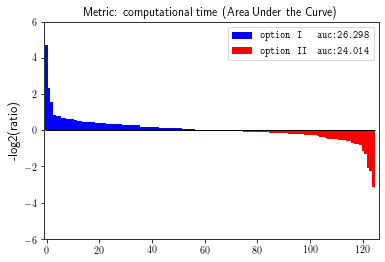

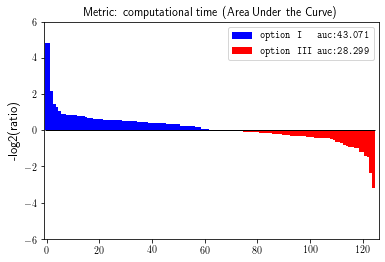

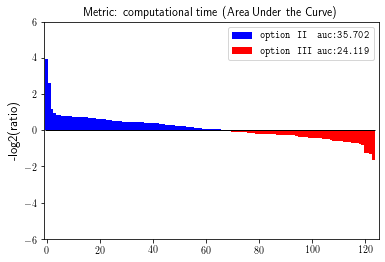

In [33]:
final = {}
final[yd_best] = yd[yd_best]
final[lee_best] = lee[lee_best]
final[schimdt_best] = schimdt[schimdt_best]
ppf = PerformanceProfile(final, failcode=2)
ppf.get_subset_by_time(threshold=1, remove_failed=True)
_ = ppf.plot(column='time',show_num=False, options={'ratio_max':6}, save=True, saveDir='./natOG/', labels=['option I\ \ \ ', 'option II\ \ ', 'option III'])

In [25]:
# class PPFSUCCESS:
#     def __init__(self, algo_df_dic, success_code=[0]):
#         self.algo_lst = [*algo_df_dic.keys()]
#         self.algo_df_dic = deepcopy(algo_df_dic)
#         fail_idx = algo_df_dic[self.algo_lst[0]].index
#         for algo in self.algo_lst:
#             frame = self.algo_df_dic[algo]
#             temp = frame[~frame['status'].isin(success_code)].index
#             fail_idx = fail_idx.intersection(temp)
#         print(f"In {len(fail_idx)} failed cases, there is at least one algorithm failed")
#         for algo in self.algo_lst:
#             frame = self.algo_df_dic[algo]
#             frame = frame.loc[~frame.index.isin(fail_idx)]
#             self.algo_df_dic[algo] = frame
#     def plot(self, column, options={}, save=False, saveDir='./', ext=None, dpi=300, 
#     show_num=False, use_tt=True, plot=True, auc=True, factor=1.5, format='pdf', labels=None):
#         if 'color' not in options.keys():
#             options['color'] = 'rgb'
#         if 'ratio_max' not in options.keys():
#             options['ratio_max'] = 1
#         self.options = options
#         self.num_algo = len(self.algo_lst)
#         pools = {}
#         for i in range(self.num_algo - 1):
#             for j in range(i + 1, self.num_algo):
#                 algo1 = self.algo_lst[i]
#                 algo2 = self.algo_lst[j]
#                 if labels is not None:
#                     algo1_label = labels[i]
#                     algo2_label = labels[j]
#                 data1 = self.algo_df_dic[algo1][column].copy()
#                 data2 = self.algo_df_dic[algo2][column].copy()
#                 data1.loc[data1 < 0] = np.inf
#                 data2.loc[data2 < 0] = np.inf
#                 ratio = (data1 / data2).to_numpy()
#                 ratio[ratio == 0] = 1e-16
#                 ratio = -np.log2(ratio)
#                 ratio[ratio == -np.log2(1e-16)] = np.inf
#                 ratio = ratio[~np.isnan(ratio)]
#                 bars_pos = np.zeros(ratio.shape)
#                 bars_neg = np.zeros(ratio.shape)
#                 flag = ratio > 0
#                 bars_pos[flag] = ratio[flag]
#                 bars_neg[~flag] = ratio[~flag]
#                 if auc:
#                     posmax = np.max(bars_pos[bars_pos != np.inf])
#                     negmin = np.min(bars_neg[bars_neg != -np.inf])
#                     ratio_max = max(posmax, -negmin)
#                     bars_pos[bars_pos == np.inf] = ratio_max * factor
#                     bars_neg[bars_neg == -np.inf] = -ratio_max * factor
#                     self.bars_pos = bars_pos
#                     self.bars_neg = bars_neg
#                 else:
#                     bars_pos[bars_pos == np.inf] = self.options['ratio_max']
#                     bars_neg[bars_neg == -np.inf] = -self.options['ratio_max']
#                 # sort in descending order
#                 bars_pos[::-1].sort()
#                 bars_neg[::-1].sort()
#                 if auc:
#                     win_auc = np.around(np.sum(bars_pos), 3)
#                     lose_auc = np.around(np.abs(np.sum(bars_neg)), 3)
#                 win = sum(flag)
#                 lose = sum(ratio < 0)
#                 if plot:
#                     figure = plt.figure()
#                     if show_num:
#                         if labels is None:
#                             label_1 = algo1 + ' {}'.format(win)
#                             label_2 = algo2 + ' {}'.format(lose)
#                         else:
#                             label_1 = algo1_label + ' {}'.format(win)
#                             label_2 = algo2_label + ' {}'.format(lose)
#                         if auc:
#                             label_1 += f' auc:{win_auc}'
#                             label_2 += f' auc:{lose_auc}'
#                     else:
#                         if labels is None:
#                             label_1 = algo1
#                             label_2 = algo2
#                         else:
#                             label_1 = algo1_label
#                             label_2 = algo2_label
#                         if auc:
#                             label_1 += f' auc:{win_auc}'
#                             label_2 += f' auc:{lose_auc}'
#                         print('{} Win:{} | Lose:{}'.format(algo1, win, lose))
#                     if use_tt:
#                         label_1 = r'\texttt{{{}}}'.format(label_1)
#                         label_2 = r'\texttt{{{}}}'.format(label_2)
#                     if self.options['color'] == 'bw':
#                         plt.bar(range(len(bars_pos)), bars_pos, color=[32 / 225, 32 / 225, 32 / 225, 1], label=label_1, width=1)
#                         plt.bar(range(len(bars_neg)), bars_neg, color=[192 / 225, 192 / 225, 192 / 225, 1], label=label_2, width=1)
#                     else:
#                         plt.bar(range(len(bars_pos)), bars_pos, color='b', label=label_1, width=1)
#                         plt.bar(range(len(bars_neg)), bars_neg, color='r', label=label_2, width=1)
#                     plt.xlim(-1, len(bars_pos) + 1)
#                     plt.ylim(-self.options['ratio_max'], self.options['ratio_max'])
#                     plt.legend()
#                     plt.hlines(y=0, xmin=0 - 0.5, xmax=len(bars_pos) - 0.5, linewidth=1)
#                     plt.ylabel('-log2(ratio)', fontsize=13)

#                     if column == 'time':
#                         text = 'computational time'
#                     elif column == 'fevals':
#                         text = 'function evaluations'
#                     elif column == 'iteration':
#                         text = 'iterations'
#                     elif column == 'subgrad_iters':
#                         text = 'subgradient iterations'
#                     else:
#                         text = column
#                     if auc:
#                         plt.title("Metric: {} (Area Under the Curve)".format(text))
#                     else:
#                         plt.title("Metric: {}".format(text))
#                     if save:
#                         if ext is None:
#                             filename = saveDir + '/{}-{}_{}.{}'.format(algo1, algo2, column, format)
#                         else:
#                             filename = saveDir + '/{}-{}_{}_{}.{}'.format(algo1, algo2, column, ext, format)
#                         # metrics
#                         if dpi:
#                             figure.savefig(filename, dpi=dpi)
#                         else:
#                             figure.savefig(filename)
#                 else:
#                     key = f'{algo1}_{algo2}'
#                     if auc:
#                         pools[key] = (win_auc, lose_auc, algo1, algo2)
#                     else:
#                         pools[key] = (win, lose, algo1, algo2)
#         return pools

In [26]:
# ppfs = PPFSUCCESS(final, success_code=[0])

In [27]:
# _ = ppfs.plot(column='time',show_num=False, options={'ratio_max':6}, save=False, saveDir='./natOG/', labels=['option I\ \ \ ', 'option II\ \ ', 'option III'])

In [28]:
# frame = final[yd_best]
# idx1 = frame[~frame['status'].isin([0])].index
# # final[yd_best][~final[yd_best]['status'].isin([0])]

In [29]:
# frame2 = final[schimdt_best]
# idx2 = frame2[~frame2['status'].isin([0])].index

In [30]:
# frame.iloc[idx1.intersection(idx2)]

In [31]:
# frame2.iloc[idx1.intersection(idx2)]

In [32]:
# frame.index.intersection(idx2)